# Personal Information
Name: **Thomas Erhard**

StudentID: **15081931**

Email: [**thomas.erhard@student.uva.nl**](thomas.erhard@student.uva.nl)

Submitted on: **22.03.2024**

GitHub Link: [**DeepRM**](https://github.com/Jinobey/DeepRM_2)

# Data Context

The dataset used for this thesis project is created by DeepRM_2 using *create_jobs.py* and thus synthetic. This presents a significant benefit, as it allows for adjustments and experiments with various settings and parameters, enabling the creation of a big volume of data for training our reinforcement learning (RL) agent. Given that Deep Reinforcement Learning (DRL) models typically require extensive data to devise an effective strategy, this feature of our dataset is particularly advantageous. While the used dataset adopts a simplified approach to encapsulate the aspects of multi-resource scheduling, it remains a complex scenario, enabling us to examine the efficacy of RL techniques in the field.

Bearing this in mind, it is anticipated that the current dataset may undergo changes in the future, which means that the exploratory data analysis (EDA) could yield different insights. Despite this, the present EDA provides a valuable initial understanding of the data's context.

# Exploratory Data Analysis

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
# Load data
df_jobs = pd.read_csv("../data/jobs.csv")
df_jobs

,Job Duration,Job Resource 1,Job Resource 2
0,15,1.0,10.0
1,3,1.0,9.0
2,17,1.0,11.0
3,1,1.0,13.0
4,2,2.0,6.0
...,...,...,...
99995,2,12.0,2.0
99996,20,5.0,1.0
99997,2,1.0,7.0
99998,17,2.0,10.0


For the purpose of this EDA, 100000 jobs have been created. A job consist of the *job duration*, which is represented by $T_j$ and is normally in the range between 1 and 18. For jobs that take more time, these are classified as anomalous jobs. As we can control the creation of anomalous jobs, we fixed them to a maximum duration of 29t:

\begin{equation}
    T_{j_{Normal}} = \{T \in \mathbb{N} \space | \space 1 \leq T \leq 18 \}
\end{equation}

\begin{equation}
    T_{j_{Anomalous}} = \{T \in \mathbb{N} \space | \space 19 \leq T \leq 29 \}
\end{equation}

Furthermore, each job consist of a *resource profile* $r_j$, that is known upon job arrival, and which consist of *d* resource types (such as CPU, memory, I/O etc.) We fixed the amount of resource types to two and operated under the assumption of no preemption and a static allocation profile. This means that $r_j$ must be consistently allocated from the start of execution until the job is complete, mirroring the approach used in DeepRM. The job resource profile is represented as an vector:

\begin{equation}
    \vec{r}_j = \left( [r1_{j_1}, r2_{j_1}], [r1_{j_2}, r2_{j_2}], \ldots, [r1_{j_n}, r2_{j_n}] \right)
\end{equation}

Here after, we define what consists of a normal and what consist of an anomalous resource requirement:

\begin{equation}
    r_{j_{Normal}} = \{r \in \mathbb{N} \space | \space 1 \leq r \leq 10 \}
\end{equation}

\begin{equation}
    r_{j_{Anomalous}} = \{r \in \mathbb{N} \space | \space 11 \leq r \leq 15 \}
\end{equation}

### Analysis:

As the data is synthetic, we have not created any missing values, errors, or outliers, other than the created anomalies. Our variables that we analyse are *Job Duration*, *Job Resource 1* and *Job Resource 2*. While the first one is an Integer, the job resource are floating point number.

In [7]:
print(df_jobs.describe(), "\n")
print(df_jobs.info())

        Job Duration  Job Resource 1  Job Resource 2
count  100000.000000   100000.000000   100000.000000
mean        6.308600        4.623360        4.629980
std         6.972817        3.452683        3.450027
min         1.000000        1.000000        1.000000
25%         2.000000        1.000000        2.000000
50%         3.000000        2.000000        5.000000
75%        13.000000        8.000000        8.000000
max        28.000000       14.000000       14.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Job Duration    100000 non-null  int64  
 1   Job Resource 1  100000 non-null  float64
 2   Job Resource 2  100000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.3 MB
None


#### Job Duration
First, we explore the distribution of the job durations.

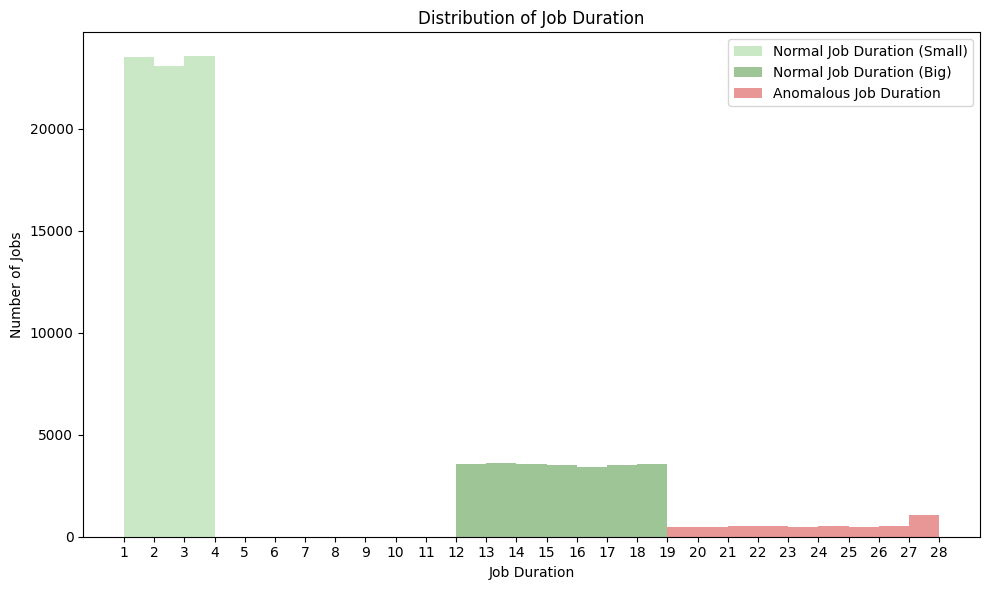

In [8]:
# Splitting the jobs into two categories (small/big) based on duration
jobs_small = df_jobs[df_jobs['Job Duration'] <= 3.6 ]['Job Duration']
jobs_big = df_jobs[(df_jobs['Job Duration'] >= 12) & (df_jobs['Job Duration'] <= 18)]['Job Duration']
jobs_anomalous = df_jobs[df_jobs['Job Duration'] > 18]['Job Duration']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plotting histograms for each category of job durations
plt.hist(jobs_small, bins=range(1, df_jobs['Job Duration'].max() + 1), alpha=0.5, label='Normal Job Duration (Small)', color="#96D38C")
plt.hist(jobs_big, bins=range(1, df_jobs['Job Duration'].max() + 1), alpha=0.5, label='Normal Job Duration (Big)', color="#3C8D2F")
plt.hist(jobs_anomalous, bins=range(1, df_jobs['Job Duration'].max() + 1), alpha=0.5, label='Anomalous Job Duration', color="#D32F2F")

# Customization
plt.title('Distribution of Job Duration')
plt.xlabel('Job Duration')
plt.ylabel('Number of Jobs')
plt.xticks(range(1, df_jobs['Job Duration'].max() + 1)) 
plt.legend() 

# Show plot
plt.tight_layout()
plt.show()

In [9]:
# Unqiue job durations
np.unique(df_jobs['Job Duration'])

array([ 1,  2,  3, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28])

In [12]:
# Total number of jobs
total_jobs = len(df_jobs)

# Normal and Anomalous Jobs
normal_jobs = df_jobs[df_jobs['Job Duration'] <= 18]
anomalous_jobs = df_jobs[df_jobs['Job Duration'] > 18]

# Small and Big Jobs (within normal jobs)
small_jobs = df_jobs[df_jobs['Job Duration'] <= 3.6]
big_jobs = df_jobs[(df_jobs['Job Duration'] > 3.6) & (df_jobs['Job Duration'] <= 18)]

# Calculate counts
count_normal = len(normal_jobs)
count_anomalous = len(anomalous_jobs)
count_small = len(small_jobs)
count_big = len(big_jobs)

# Calculate proportions
prop_normal = count_normal / total_jobs
prop_anomalous = count_anomalous / total_jobs
prop_small = count_small / total_jobs
prop_big = count_big / total_jobs

# Print results
print(f"Total Jobs: {total_jobs}")
print(f"Normal Jobs: {count_normal} ({prop_normal:.2%})")
print(f"Anomalous Jobs: {count_anomalous} ({prop_anomalous:.2%})")
print(f"Small Jobs: {count_small} ({prop_small:.2%})")
print(f"Big Jobs: {count_big} ({prop_big:.2%})")

Total Jobs: 100000
Normal Jobs: 94953 (94.95%)
Anomalous Jobs: 5047 (5.05%)
Small Jobs: 70165 (70.17%)
Big Jobs: 24788 (24.79%)


We can observe, that the job durations are categorised in two categories, normal and anomalous jobs. Anomalous jobs have a durations of 18 or higher, while jobs with a duration equal or less than 18 are considered of normal length. It can be observed, that the distribution of normal jobs is quite interesting, with again two categories, small and big jobs. Small jobs are defined as $[1, \space T_{j_{max}}/5] = [1, \space 18 /5] = [1, \space 3.6]$ and big jobs are defined as $[T_{j_{max}} * 2/3, \space T_{j_{max}}] = [18 * 2/3, \space 18] = [12, \space 18]$,

where $T_{j_{max}}$ = Maximum Normal Job Duration

There are no jobs with a duration in between 3.6 and 12t as of now.

#### Job Resources

In [13]:
# Unqiue job resources
np.unique(df_jobs['Job Resource 1']) #same for resource 2

array([ 1.,  2.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.])

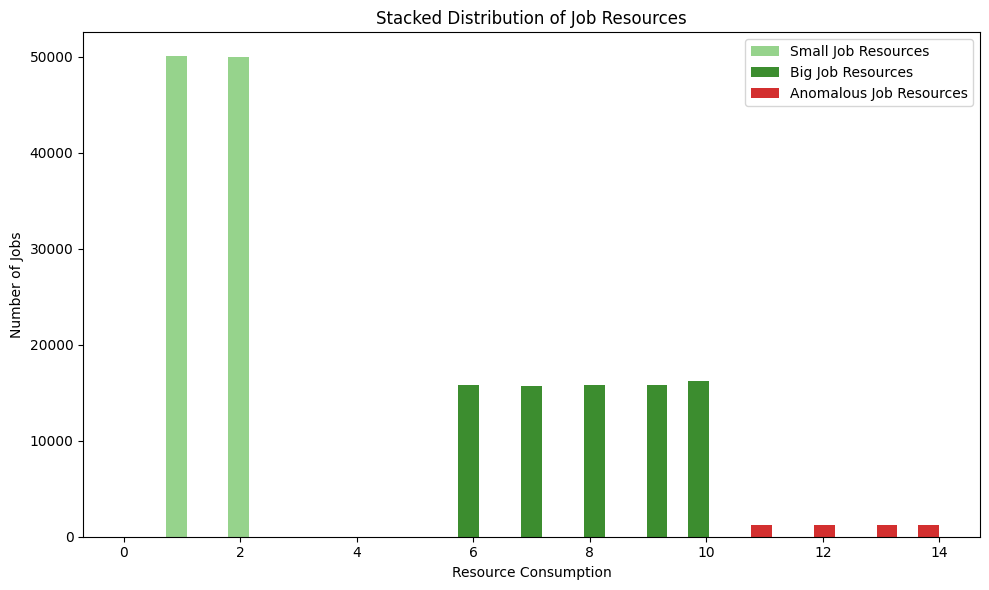

In [14]:
# Categorize 'Job Resource 1'
jobs_small_res1 = df_jobs[df_jobs['Job Resource 1'] <= 2]['Job Resource 1']
jobs_big_res1 = df_jobs[(df_jobs['Job Resource 1'] > 5) & (df_jobs['Job Resource 1'] <= 10)]['Job Resource 1']
jobs_anomalous_res1 = df_jobs[df_jobs['Job Resource 1'] > 10]['Job Resource 1']

# Categorize 'Job Resource 2'
jobs_small_res2 = df_jobs[df_jobs['Job Resource 2'] <= 2]['Job Resource 2']
jobs_big_res2 = df_jobs[(df_jobs['Job Resource 2'] > 5) & (df_jobs['Job Resource 2'] <= 10)]['Job Resource 2']
jobs_anomalous_res2 = df_jobs[df_jobs['Job Resource 2'] > 10]['Job Resource 2']

# Combine categories from both resources for stacking
jobs_small_combined = np.hstack((jobs_small_res1, jobs_small_res2))
jobs_big_combined = np.hstack((jobs_big_res1, jobs_big_res2))
jobs_anomalous_combined = np.hstack((jobs_anomalous_res1, jobs_anomalous_res2))

# Determine the range for bins
max_resource_value = max(jobs_small_combined.max(), jobs_big_combined.max(), jobs_anomalous_combined.max())
bins_range = np.linspace(0, max_resource_value, 40)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Stacking histograms for each category
plt.hist([jobs_small_combined, jobs_big_combined, jobs_anomalous_combined], bins=bins_range, stacked=True, label=['Small Job Resources', 'Big Job Resources', 'Anomalous Job Resources'], color=["#96D38C", "#3C8D2F", "#D32F2F"])

# Customization
plt.title('Stacked Distribution of Job Resources')
plt.xlabel('Resource Consumption')
plt.ylabel('Number of Jobs')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

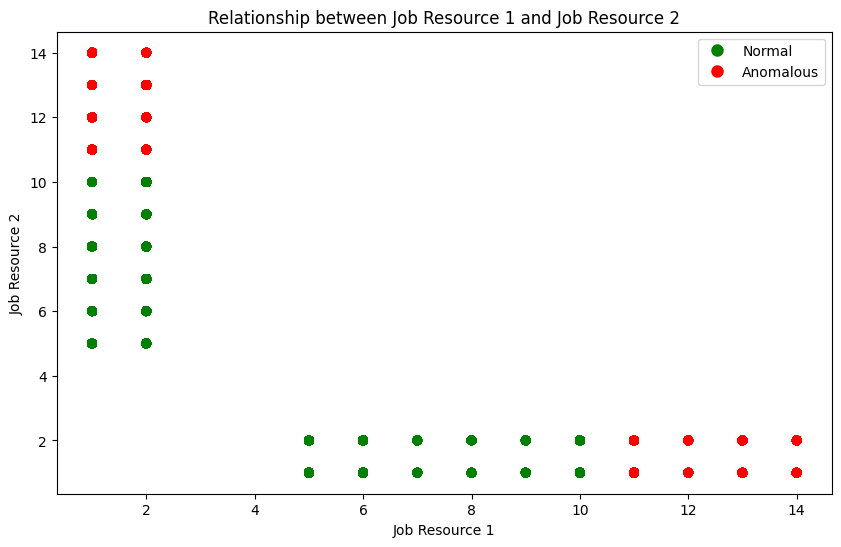

In [15]:
from matplotlib.lines import Line2D

# Assuming your DataFrame is df_jobs

# Define conditions for each category
conditions = [
    # Normal: Either Resource 1 is big and Resource 2 is small, or Resource 2 is big and Resource 1 is small
    (((df_jobs['Job Resource 1'] >= 5) & (df_jobs['Job Resource 1'] <= 10) & (df_jobs['Job Resource 2'] >= 1) & (df_jobs['Job Resource 2'] <= 2)) |
     ((df_jobs['Job Resource 2'] >= 5) & (df_jobs['Job Resource 2'] <= 10) & (df_jobs['Job Resource 1'] >= 1) & (df_jobs['Job Resource 1'] <= 2))),
    # Anomalous: Resource 1 or Resource 2 is anomalously high
    ((df_jobs['Job Resource 1'] >= 11) & (df_jobs['Job Resource 1'] <= 15)) | 
    ((df_jobs['Job Resource 2'] >= 11) & (df_jobs['Job Resource 2'] <= 15))
]

choices = ['Normal', 'Anomalous']
df_jobs['Category'] = np.select(conditions, choices)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'Normal': 'green', 'Anomalous': 'red'}

ax.scatter(df_jobs['Job Resource 1'], df_jobs['Job Resource 2'], c=df_jobs['Category'].map(colors), alpha=0.5)
ax.set_xlabel('Job Resource 1')
ax.set_ylabel('Job Resource 2')
ax.set_title('Relationship between Job Resource 1 and Job Resource 2')

# Creating a custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Anomalous', markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements)

plt.show()

In [16]:
small_jobs = df_jobs[((df_jobs['Job Resource 1'] >= 1) & (df_jobs['Job Resource 1'] <= 2)) | ((df_jobs['Job Resource 2'] >= 1) & (df_jobs['Job Resource 2'] <= 2))]
big_jobs = df_jobs[((df_jobs['Job Resource 1'] >= 5) & (df_jobs['Job Resource 1'] <= 10)) | ((df_jobs['Job Resource 2'] >= 5) & (df_jobs['Job Resource 2'] <= 10))]
anomalous_jobs = df_jobs[((df_jobs['Job Resource 1'] >= 11) & (df_jobs['Job Resource 1'] <= 15)) | ((df_jobs['Job Resource 2'] >= 11) & (df_jobs['Job Resource 2'] <= 15))]

# Calculate counts
count_small = len(small_jobs)
count_big = len(big_jobs)
count_anomalous = len(anomalous_jobs)
total_jobs = count_small + count_big + count_anomalous  # Recalculated to exclude any jobs not fitting the defined categories

# Calculate proportions
prop_small = count_small / total_jobs
prop_big = count_big / total_jobs
prop_anomalous = count_anomalous / total_jobs

# Print results
print(f"Total Job Resources Categorized: {total_jobs}")
print(f"Small Job Resources: {count_small} ({prop_small:.2%})")
print(f"Big Job Resources: {count_big} ({prop_big:.2%})")
print(f"Anomalous Job Resources: {count_anomalous} ({prop_anomalous:.2%})")

Total Job Resources Categorized: 200000
Small Job Resources: 100000 (50.00%)
Big Job Resources: 95106 (47.55%)
Anomalous Job Resources: 4894 (2.45%)


Same as with the Job Duration, the Job Resource are also divided into small, big and anomalous resources. Small resources are defined as $[1, \space r_{j_{max}}/5] = [1, \space 10 /5] = [1, \space 2]$ and big resources are defined as $[r_{j_{max}} / 2, \space r_{j_{max}}] = [10 / 2, \space 10] = [5, \space 10]$,

where $r_{j_{max}}$ = Maximum Normal Job Resource

We can observe, that both job resources (Job Resource 1 and Job Resource 2) have overall the same distribution. There is a relationship between the resources, meaning there is always one dominant resource per job, which is either a big or anomalous resource, while the other resource is a small resource. The chance that a resource is dominant is 50%. Overall, only 2.45% of resources are anomalous, which mean nthat approximatly 4.9% of resources profiles are anomalous.